In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sqlite3
import pandas as pd
import pandasql as ps
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('games.csv')
champ2 = pd.read_json('champion_info_2.json')

# **Predição de jogo (Objetivos)**

In [ ]:
data.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [ ]:
clear_data = data.drop(columns=['gameId', 'creationTime', 'seasonId'])
x = clear_data[['firstBlood','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']]
y = clear_data['winner']
x.head()

,firstBlood,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,2,1,1,1,2
1,1,1,0,1,1
2,2,1,1,2,0
3,1,1,1,1,0
4,2,1,1,1,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
KN = KNeighborsClassifier()
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(KN, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

model = grid.fit(x_train,y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


In [ ]:
print(model.best_params_)
print(model.best_score_)

{'n_neighbors': 19}
0.8917173145985944


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=8)

modelo = KNN.fit(x_train,y_train)

y_test_hat=KNN.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)

test_accuracy

0.886048337841375

In [ ]:
x_pred = pd.DataFrame(data={'firstBlood': [1], 'firstInhibitor': [2],'firstBaron': [2],'firstDragon': [1],'firstRiftHerald': [1]})

In [ ]:
y_x_pred=KNN.predict(x_pred)
print(y_x_pred)

[2]


In [ ]:
Game_duration_15 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 15 and ((gameDuration)/60) < 20
  '''

Game_table_15 = ps.sqldf(Game_duration_15)
Game_15_d = pd.DataFrame(Game_table_15)
Game_15_d.head()

,Duração de Jogo
0,2573


In [ ]:
Game_duration_20 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 20 and ((gameDuration)/60) < 25
  '''

Game_table_20 = ps.sqldf(Game_duration_20)
Game_20_d = pd.DataFrame(Game_table_20)
Game_20_d.head()

,Duração de Jogo
0,8964


In [ ]:
Game_duration_25 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 25 and ((gameDuration)/60) < 30
  '''

Game_table_25 = ps.sqldf(Game_duration_25)
Game_25_d = pd.DataFrame(Game_table_25)
Game_25_d.head()

,Duração de Jogo
0,14015


In [ ]:
Game_duration_30 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 30 and ((gameDuration)/60) < 35
  '''

Game_table_30 = ps.sqldf(Game_duration_30)
Game_30_d = pd.DataFrame(Game_table_30)
Game_30_d.head()

,Duração de Jogo
0,14049


In [ ]:
Game_duration_35 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 35 and ((gameDuration)/60) < 40
  '''

Game_table_35 = ps.sqldf(Game_duration_35)
Game_35_d = pd.DataFrame(Game_table_35)
Game_35_d.head()

,Duração de Jogo
0,9420


In [ ]:
Game_duration_40 = '''select count
        ((gameDuration)/60) as 'Duração de Jogo'
      from
        data
      where
        ((gameDuration)/60) >= 40 and ((gameDuration)/60) < 45
  '''

Game_table_40 = ps.sqldf(Game_duration_40)
Game_40_d = pd.DataFrame(Game_table_40)
Game_40_d.head()

,Duração de Jogo
0,4480


In [ ]:
Game_15 = (Game_15_d.iloc[0,0])
Game_20 = (Game_20_d.iloc[0,0])
Game_25 = (Game_25_d.iloc[0,0])
Game_30 = (Game_30_d.iloc[0,0])
Game_35 = (Game_35_d.iloc[0,0])
Game_40 = (Game_40_d.iloc[0,0])

In [ ]:
Game_Duration = pd.DataFrame(data={'15-20' : [Game_15],'20-25' : [Game_20],
                                       '25-30':[Game_25],'30-35' : [Game_30],
                                       '35-40':[Game_35],'40-35' : [Game_40]})

In [ ]:
Game_Duration.rename(index={0: "Game Duration"}, inplace=True)
Game_Duration.head()

,15-20,20-25,25-30,30-35,35-40,40-35
Game Duration,2573,8964,14015,14049,9420,4480


In [ ]:
Game_Duration_tranp = Game_Duration.T

Text(0, 0.5, 'Counts')

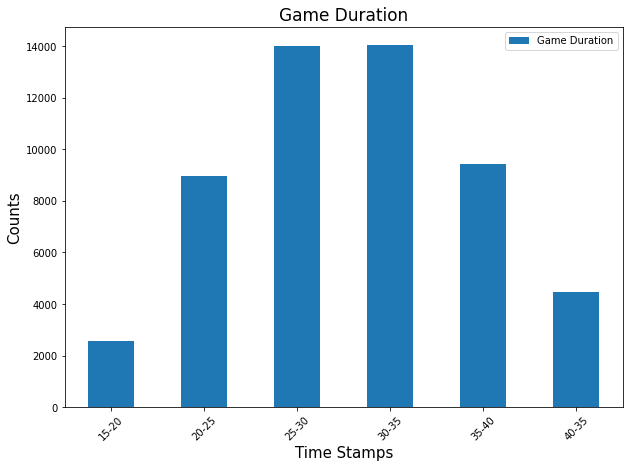

In [ ]:
Game_Duration_tranp.plot(kind='bar',title = 'test_1', figsize=(10, 7))
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Game Duration",size=17)
plt.xlabel("Time Stamps",size=15)
plt.ylabel("Counts",size=15)

# **Análise de Campeões**

In [ ]:
champ2.head()

,type,version,data
Aatrox,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Da..."
Ahri,champion,7.18.1,"{'tags': ['Mage', 'Assassin'], 'title': 'the N..."
Akali,champion,7.18.1,"{'tags': ['Assassin'], 'title': 'the Fist of S..."
Alistar,champion,7.18.1,"{'tags': ['Tank', 'Support'], 'title': 'the Mi..."
Amumu,champion,7.18.1,"{'tags': ['Tank', 'Mage'], 'title': 'the Sad M..."


In [ ]:
camp_dados = np.array(champ2['data'])
lista_camp = []
for i in camp_dados:
  lista_camp.append(i)

In [ ]:
df_camp_dirty=pd.DataFrame(lista_camp)
df_camp = df_camp_dirty.drop(columns=['tags'])
df_camp

,title,id,key,name
0,the Darkin Blade,266,Aatrox,Aatrox
1,the Nine-Tailed Fox,103,Ahri,Ahri
2,the Fist of Shadow,84,Akali,Akali
3,the Minotaur,12,Alistar,Alistar
4,the Sad Mummy,32,Amumu,Amumu
...,...,...,...,...
134,the Secret Weapon,154,Zac,Zac
135,the Master of Shadows,238,Zed,Zed
136,the Hexplosives Expert,115,Ziggs,Ziggs
137,the Chronokeeper,26,Zilean,Zilean


In [ ]:
x_axis1 = '''select name from df_camp limit 12'''
y_axis1 = '''select winner from y limit 12'''
x_axis = pd.DataFrame(ps.sqldf(x_axis1))
y_axis = pd.DataFrame(ps.sqldf(y_axis1))

In [ ]:
q = '''select distinct
        c.name as champion, d.t1_champ1id as id
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      order by
        id asc
      limit 5
  '''

champions_id = ps.sqldf(q)
k = pd.DataFrame(champions_id)
k

,champion,id
0,Annie,1
1,Olaf,2
2,Galio,3
3,Twisted Fate,4
4,Xin Zhao,5


<function matplotlib.pyplot.show(close=None, block=None)>

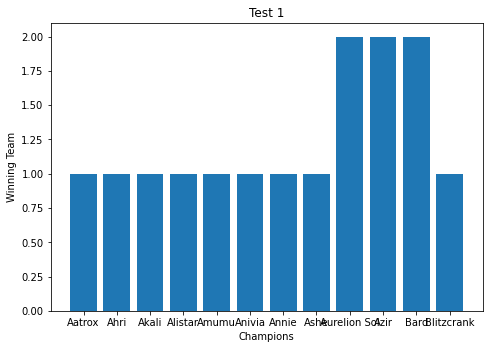

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_axis['name'],y_axis['winner'])
ax.set_xlabel('Champions')
ax.set_title('Test 1')
ax.set_ylabel('Winning Team')
plt.show

In [ ]:
g = '''select
        c.name as champion,
        d.t1_champ1id as 'id 1 team 1',
        d.winner as winner
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Darius' and (d.winner) = 1
  '''

Darius_table = ps.sqldf(g)
L = pd.DataFrame(Darius_table)
L.head(20)

,champion,id 1 team 1,winner
0,Darius,122,1
1,Darius,122,1
2,Darius,122,1
3,Darius,122,1
4,Darius,122,1
5,Darius,122,1
6,Darius,122,1
7,Darius,122,1
8,Darius,122,1
9,Darius,122,1


In [ ]:
Darius_win_count = '''select
        count(c.name) as 'champion win count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Darius' and (d.winner) = 1
  '''

Darius_win_table = ps.sqldf(Darius_win_count)
Darius_win_data = pd.DataFrame(Darius_win_table)
Darius_win_data.head()

,champion win count
0,239


In [ ]:
total_count = '''select
        count(c.name) as 'champion count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Darius'
  '''

Darius_total_table = ps.sqldf(total_count)
Darius_total_data = pd.DataFrame(Darius_total_table)
Darius_total_data.head()

,champion count
0,452


In [ ]:
Darius_win_rate = (Darius_win_data.iloc[0,0]/Darius_total_data.iloc[0,0])*100
Darius_win_rate


52.876106194690266

In [ ]:
Olaf_win_count = '''select
        count(c.name) as 'champion win count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Olaf' and (d.winner) = 1
  '''

Olaf_win_table = ps.sqldf(Olaf_win_count)
Olaf_win_data = pd.DataFrame(Olaf_win_table)
Olaf_win_data.head()

,champion win count
0,88


In [ ]:
Olaf_total_count = '''select
        count(c.name) as 'champion count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Olaf'
  '''

Olaf_total_table = ps.sqldf(Olaf_total_count)
Olaf_total_data = pd.DataFrame(Olaf_total_table)
Olaf_total_data.head()

,champion count
0,200


In [ ]:
Olaf_win_rate = (Olaf_win_data.iloc[0,0]/Olaf_total_data.iloc[0,0])*100
Olaf_win_rate

44.0

In [ ]:
Draven_win_count = '''select
        count(c.name) as 'champion win count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Draven' and (d.winner) = 1
  '''

Draven_win_table = ps.sqldf(Draven_win_count)
Draven_win_data = pd.DataFrame(Draven_win_table)
Draven_win_data.head()

,champion win count
0,248


In [ ]:
Draven_total_count = '''select
        count(c.name) as 'champion count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Draven'
  '''

Draven_total_table = ps.sqldf(Draven_total_count)
Draven_total_data = pd.DataFrame(Draven_total_table)
Draven_total_data.head()

,champion count
0,506


In [ ]:
Draven_win_rate = (Draven_win_data.iloc[0,0]/Draven_total_data.iloc[0,0])*100
Draven_win_rate

49.01185770750988

In [ ]:
Jinx_win_count = '''select
        count(c.name) as 'champion win count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Jinx' and (d.winner) = 1
  '''

Jinx_win_table = ps.sqldf(Jinx_win_count)
Jinx_win_data = pd.DataFrame(Jinx_win_table)
Jinx_win_data.head()

,champion win count
0,448


In [ ]:
Jinx_total_count = '''select
        count(c.name) as 'champion count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Jinx'
  '''

Jinx_total_table = ps.sqldf(Jinx_total_count)
Jinx_total_data = pd.DataFrame(Jinx_total_table)
Jinx_total_data.head()

,champion count
0,903


In [ ]:
Jinx_win_rate = (Jinx_win_data.iloc[0,0]/Jinx_total_data.iloc[0,0])*100
Jinx_win_rate

49.6124031007752

In [ ]:
Sona_win_count = '''select
        count(c.name) as 'champion win count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Sona' and (d.winner) = 1
  '''

Sona_win_table = ps.sqldf(Sona_win_count)
Sona_win_data = pd.DataFrame(Sona_win_table)
Sona_win_data.head()

,champion win count
0,291


In [ ]:
Sona_total_count = '''select
        count(c.name) as 'champion count'
      from
        data as d
      left join
        df_camp as c
      on
        d.t1_champ1id = c.id
      where
        (c.name) = 'Sona'
  '''

Sona_total_table = ps.sqldf(Sona_total_count)
Sona_total_data = pd.DataFrame(Sona_total_table)
Sona_total_data.head()

,champion count
0,516


In [ ]:
Sona_win_rate = (Sona_win_data.iloc[0,0]/Sona_total_data.iloc[0,0])*100
Sona_win_rate

56.395348837209305

In [ ]:
Champion_win_rate = pd.DataFrame(data={'Darius':[Darius_win_rate],'Olaf':[Olaf_win_rate],
                                       'Draven':[Draven_win_rate],'Jinx':[Jinx_win_rate],
                                       'Sona':[Sona_win_rate]})

In [ ]:
Champion_win_rate.rename(index={0: "Win Rate"}, inplace=True)
Champion_win_rate.head()

,Darius,Olaf,Draven,Jinx,Sona
Win Rate,52.876106,44.0,49.011858,49.612403,56.395349


In [ ]:
Champion_win_rate_tranp = Champion_win_rate.T
Champion_win_rate_tranp.head()

,Win Rate
Darius,52.876106
Olaf,44.000000
Draven,49.011858
Jinx,49.612403
Sona,56.395349


Text(0, 0.5, 'Win Rate (%)')

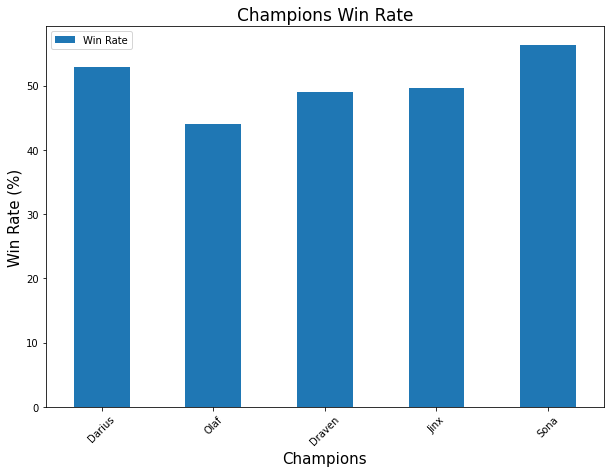

In [ ]:
Champion_win_rate_tranp.plot(kind='bar',title = 'test', figsize=(10, 7))
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Champions Win Rate",size=17)
plt.xlabel("Champions",size=15)
plt.ylabel("Win Rate (%)",size=15)